<a href="https://colab.research.google.com/github/jnsbrdbr/thesis/blob/thesis/realpart7_TGan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-rc0

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.8.0


In [2]:
import keras
from keras.layers import Input, Dense, Activation, LeakyReLU, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
import keras.backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip3 install pickle5
import pickle5 as pickle

In [5]:
with open('/content/drive/MyDrive/10000/Tresult.pkl', "rb") as fh:
  result = pickle.load(fh)

In [6]:
#final data
print(result)

              0         1          2         3         4         5         6  \
0     -2.231665 -3.223353  -0.847867 -0.985074 -0.787323 -0.987113 -0.438315   
1     -2.231665 -3.223353  -0.847867 -0.985074 -0.787323 -0.987113 -0.438315   
2     -2.231665 -3.223353  -0.847867 -0.985074 -0.787323 -0.987113 -0.438315   
3     -2.231665 -3.223353  -0.847867 -0.985074 -0.787323 -0.987113 -0.438315   
4     -2.231871 -3.223762  -0.848254 -0.985617 -0.787896 -0.987987 -0.439101   
...         ...       ...        ...       ...       ...       ...       ...   
13209 -2.231665 -3.223353  -0.847867 -0.985074 -0.787323 -0.987113 -0.438315   
13210 -2.857167 -4.505172  18.597988  3.823025  1.277678  0.768726  0.145001   
13211 -2.231665 -3.223353  -0.847867 -0.985074 -0.787323 -0.987113 -0.438315   
13212 -2.231665 -3.223353  -0.847867 -0.985074 -0.787323 -0.987113 -0.438315   
13213 -2.231665 -3.223353  -0.847867 -0.985074 -0.787323 -0.987113 -0.438315   

              7         8         9  ..

In [7]:
#divide data in to data_label and non_data label

import copy
result_nonlabel=copy.deepcopy(result)
del result_nonlabel['label']
X=result_nonlabel
y=result.label

In [8]:
#splitting data in to test and train...

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,shuffle=True)#random_state=42,

In [9]:
print('shape of x_train is:',X_train.shape)
print('shape of x_test is:',X_test.shape)

shape of x_train is: (9249, 100)
shape of x_test is: (3965, 100)


In [10]:
def make_latent_samples(n_samples, sample_size):
    #return np.random.uniform(-1, 1, size=(n_samples, sample_size))
    return np.random.normal(loc=0, scale=1, size=(n_samples, sample_size))

In [11]:
make_latent_samples(1, 100) # generates one sample

array([[ 5.39225659e-01, -7.72792648e-01, -1.57208077e+00,
         1.58267623e+00,  7.56683933e-01,  6.61284588e-02,
         8.60332483e-04,  3.51877483e-01,  7.79838340e-01,
         8.15028157e-01, -4.90407367e-01, -1.02423841e+00,
         2.10309601e+00, -5.91301995e-01,  1.22328008e+00,
         3.52949989e-02,  2.89029648e-01,  2.54189521e-01,
        -2.08839702e+00,  1.32093221e+00, -2.17356492e+00,
         5.65314185e-01, -6.06570207e-01,  3.29185594e-01,
        -1.24721770e+00, -7.26961722e-01,  1.94805395e+00,
        -9.28571845e-01,  4.26105677e-01,  1.23909329e+00,
         5.17657984e-01,  1.08408866e+00,  1.74046224e-01,
        -5.31637523e-01,  1.52211463e+00,  2.30000400e-02,
        -2.87205411e-02,  8.94599435e-01, -1.40575179e-01,
         7.20488980e-01, -2.19539566e+00,  4.08072965e-01,
         5.23346330e-01,  1.91742817e-01,  1.28798367e+00,
        -4.05709048e-01,  1.55295690e+00,  9.13288372e-01,
        -1.49691323e+00,  4.75832333e-02,  1.67151689e+0

In [12]:
generator = Sequential([
    Dense(128, input_shape=(100,)),
    LeakyReLU(alpha=0.2),
    BatchNormalization(momentum=0.7),

    #Dense(100),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    #Dense(1024),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    #Dense(2048),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    Dense(100),
    Activation('tanh')
], name='generator')

generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
Total params: 26,340
Trainable params: 26,084
Non-trainable params: 256
___________________________________________________

In [13]:
discriminator = Sequential([
    Dense(64, input_shape=(100,)),
    LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    Dense(32),
    LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    #Dense(128),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),
    #Dense(64),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    #Dense(32),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    #Dense(16),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    Dense(1),
    Activation('sigmoid')
], name='discriminator')

discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 8,577
Trainable params: 8,577
Non-train

In [14]:
# maintain the same shared weights with the generator and the discriminator.
gan = Sequential([
    generator,
    discriminator
])

gan.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 generator (Sequential)      (None, 100)               26340     
                                                                 
 discriminator (Sequential)  (None, 1)                 8577      
                                                                 
Total params: 34,917
Trainable params: 34,661
Non-trainable params: 256
_________________________________________________________________


In [15]:
def make_trainable(model, trainable):
    for layer in model.layers:
        layer.trainable = trainable

In [16]:
make_trainable(discriminator, False)
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 8,577
Trainable params: 0
Non-trainable

In [17]:
make_trainable(discriminator, True)
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 8,577
Trainable params: 8,577
Non-train

In [18]:
def make_simple_GAN(sample_size, 
                    g_hidden_size_1,
                    g_hidden_size_2,
                    g_hidden_size_3,
                    g_hidden_size_4,
                    d_hidden_size_1,
                    d_hidden_size_2, 
                    d_hidden_size_3,
                    d_hidden_size_4,
                    d_hidden_size_5,
                    d_hidden_size_6,
                    leaky_alpha, 
                    g_learning_rate,
                    d_learning_rate):
    K.clear_session()
    
    generator = Sequential([
        Dense(g_hidden_size_1, input_shape=(sample_size,)),
        LeakyReLU(alpha=leaky_alpha),
        BatchNormalization(momentum=0.7),

        #Dense(g_hidden_size_2),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        #Dense(g_hidden_size_3),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        #Dense(g_hidden_size_4),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        Dense(100),        
        Activation('tanh')
    ], name='generator')    

    discriminator = Sequential([
        Dense(d_hidden_size_1, input_shape=(100,)),
        LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        Dense(d_hidden_size_2),
        LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        #Dense(d_hidden_size_3),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        #Dense(d_hidden_size_4),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        #Dense(d_hidden_size_5),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        #Dense(d_hidden_size_6),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        Dense(1),
        Activation('sigmoid')
    ], name='discriminator')    
    
    gan = Sequential([
        generator,
        discriminator
    ])
    
    discriminator.compile(optimizer=Adam(lr=d_learning_rate), loss='binary_crossentropy')
    gan.compile(optimizer=Adam(lr=g_learning_rate), loss='binary_crossentropy')
    
    return gan, generator, discriminator 

In [19]:
from sklearn import preprocessing
def preprocess(x):
   x = preprocessing.scale(x)
   return x

In [20]:
X_train_real = np.array(preprocess(X_train))
X_test_real  = np.array(preprocess(X_test))

In [21]:
while(False):

  def deprocess(x):
    x = (x / 2 + 1) * 7454.516836076623
    x = np.clip(x, -127.3838709715454, 7454.516836076623)
    x = np.uint8(x)
    x = x.reshape(-1, 70)
    return x

In [22]:
def make_labels(size):
    return np.ones([size, 1]), np.zeros([size, 1])

In [23]:
y_real_10, y_fake_10 = make_labels(10)

y_real_10, y_fake_10

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]), array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [24]:
# hyperparameters
sample_size     = 100     # latent sample size (i.e., 100 random numbers)
g_hidden_size_1 = 128
g_hidden_size_2 = 0
g_hidden_size_3 = 0
g_hidden_size_4 = 0
d_hidden_size_1 = 64
d_hidden_size_2 = 32
d_hidden_size_3 = 0
d_hidden_size_4 = 0
d_hidden_size_5 = 0
d_hidden_size_6 = 0
leaky_alpha     = 0.2
g_learning_rate = 0.0001  # learning rate for the generator
d_learning_rate = 0.0001   # learning rate for the discriminator
epochs          = 100
batch_size      = 64      # train batch size
eval_size       = 16      # evaluate size
smooth          = 0.1


In [25]:
## labels for the batch size and the test size
y_train_real, y_train_fake = make_labels(batch_size)
y_eval_real,  y_eval_fake  = make_labels(eval_size)

# create a GAN, a generator and a discriminator
gan, generator, discriminator = make_simple_GAN(
    sample_size, 
    g_hidden_size_1, 
    g_hidden_size_2,
    g_hidden_size_3,
    g_hidden_size_4, 
    d_hidden_size_1, 
    d_hidden_size_2,
    d_hidden_size_3,
    d_hidden_size_4,
    d_hidden_size_5,
    d_hidden_size_6,
    leaky_alpha, 
    g_learning_rate,
    d_learning_rate)


losses = []
losses1 = []
for e in range(epochs):
    for i in range(len(X_train_real)//batch_size):
        # real MNIST digit images
        X_batch_real = X_train_real[i*batch_size:(i+1)*batch_size]
        
        # latent samples and the generated digit images
        latent_samples = make_latent_samples(batch_size, sample_size)
        X_batch_fake = generator.predict_on_batch(latent_samples)
        
        # train the discriminator to detect real and fake images
        make_trainable(discriminator, True)
        discriminator.train_on_batch(X_batch_real, y_train_real * (1 - smooth))
        discriminator.train_on_batch(X_batch_fake, y_train_fake)

        # train the generator via GAN
        make_trainable(discriminator, False)
        gan.train_on_batch(latent_samples, y_train_real)
   # evaluate
    X_eval_real = X_test_real[np.random.choice(len(X_test_real), eval_size, replace=False)]
    
    latent_samples = make_latent_samples(eval_size, sample_size)
    X_eval_fake = generator.predict_on_batch(latent_samples)

    d_loss  = discriminator.test_on_batch(X_eval_real, y_eval_real)
    d_loss += discriminator.test_on_batch(X_eval_fake, y_eval_fake)
    g_loss  = gan.test_on_batch(latent_samples, y_eval_real) # we want the fake to be realistic!
    
    losses.append((d_loss, g_loss))

    d_acc_real = discriminator.train_on_batch(X_batch_real, y_train_real * (1 - smooth))
    d_acc_fake = discriminator.train_on_batch(X_batch_fake, y_train_fake)
    d_acc  = 0.5 * (d_acc_real + d_acc_fake)

    #losses1.append(( d_acc))
    print("Epoch: {:>3}/{} Discriminator Loss: {:>6.4f} Generator Loss: {:>6.4f} Discriminator acc:{:>6.4f}".format(
        e+1, epochs, d_loss, g_loss,d_acc)) #Discriminator acc: {:>6.4f}:,d_acc

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch:   1/100 Discriminator Loss: 1.5971 Generator Loss: 0.3945 Discriminator acc:0.8235:
Epoch:   2/100 Discriminator Loss: 1.5267 Generator Loss: 0.3798 Discriminator acc:0.8495:
Epoch:   3/100 Discriminator Loss: 1.6184 Generator Loss: 0.3584 Discriminator acc:0.8782:
Epoch:   4/100 Discriminator Loss: 1.8430 Generator Loss: 0.2732 Discriminator acc:0.8707:
Epoch:   5/100 Discriminator Loss: 1.7979 Generator Loss: 0.2851 Discriminator acc:0.9076:
Epoch:   6/100 Discriminator Loss: 1.8413 Generator Loss: 0.2833 Discriminator acc:0.8944:
Epoch:   7/100 Discriminator Loss: 1.8972 Generator Loss: 0.2752 Discriminator acc:0.9012:
Epoch:   8/100 Discriminator Loss: 1.7545 Generator Loss: 0.2890 Discriminator acc:0.9083:
Epoch:   9/100 Discriminator Loss: 1.7127 Generator Loss: 0.3187 Discriminator acc:0.9226:
Epoch:  10/100 Discriminator Loss: 1.7187 Generator Loss: 0.2967 Discriminator acc:0.9059:
Epoch:  11/100 Discriminator Loss: 1.7081 Generator Loss: 0.2991 Discriminator acc:0.8954:

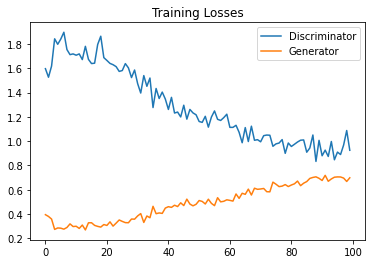

In [26]:
losses = np.array(losses)

fig, ax = plt.subplots()
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()
plt.show()

In [27]:
rr = discriminator.predict_on_batch(X_test_real)

In [28]:
y_test

5895     1
9481     1
11811    0
3130     1
2213     1
        ..
10530    0
6056     1
7703     1
3263     1
11798    0
Name: label, Length: 3965, dtype: int64

In [29]:
rr

array([[0.87740064],
       [0.85525334],
       [0.45105594],
       ...,
       [0.885713  ],
       [0.852923  ],
       [0.38827002]], dtype=float32)

In [30]:
import keras
#import keras_metrics

r = tf.keras.metrics.Recall()#thresholds=rr.min())
r.update_state(y_test,rr )
r.result().numpy()


0.9996603

In [31]:
p=tf.keras.metrics.Precision()#thresholds=rr.min())
p.update_state(y_test,rr )
p.result().numpy()

0.8054187

In [32]:
r = tf.keras.metrics.BinaryAccuracy()#thresholds=rr.min())
r.update_state(y_test,rr )
r.result().numpy()


0.8204287